### Introduction

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Number of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

### Load libraries

In [9]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

### Load dataset

In [10]:
cust_data = pd.read_csv("/content/drive/MyDrive/DS Course Uploads/Datasets/CC_GENERAL.csv")

In [11]:
cust_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Summarize data

In [12]:
cust_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
cust_data.duplicated().any()

False

In [14]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [15]:
cust_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Perform EDA

In [16]:
cust_data.drop('CUST_ID', axis=1, inplace=True)

In [17]:
idx = cust_data[cust_data['CREDIT_LIMIT'].isnull()].index[0]

In [18]:
idx

5203

In [19]:
cust_data.drop(idx, axis='index', inplace=True)

In [20]:
cust_data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [21]:
cust_data['MINIMUM_PAYMENTS'] = cust_data['MINIMUM_PAYMENTS'].fillna(0)

In [22]:
cust_data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [23]:
cust_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [24]:
cust_data.TENURE.value_counts()

TENURE
12    7584
11     365
10     236
6      203
8      196
7      190
9      175
Name: count, dtype: int64

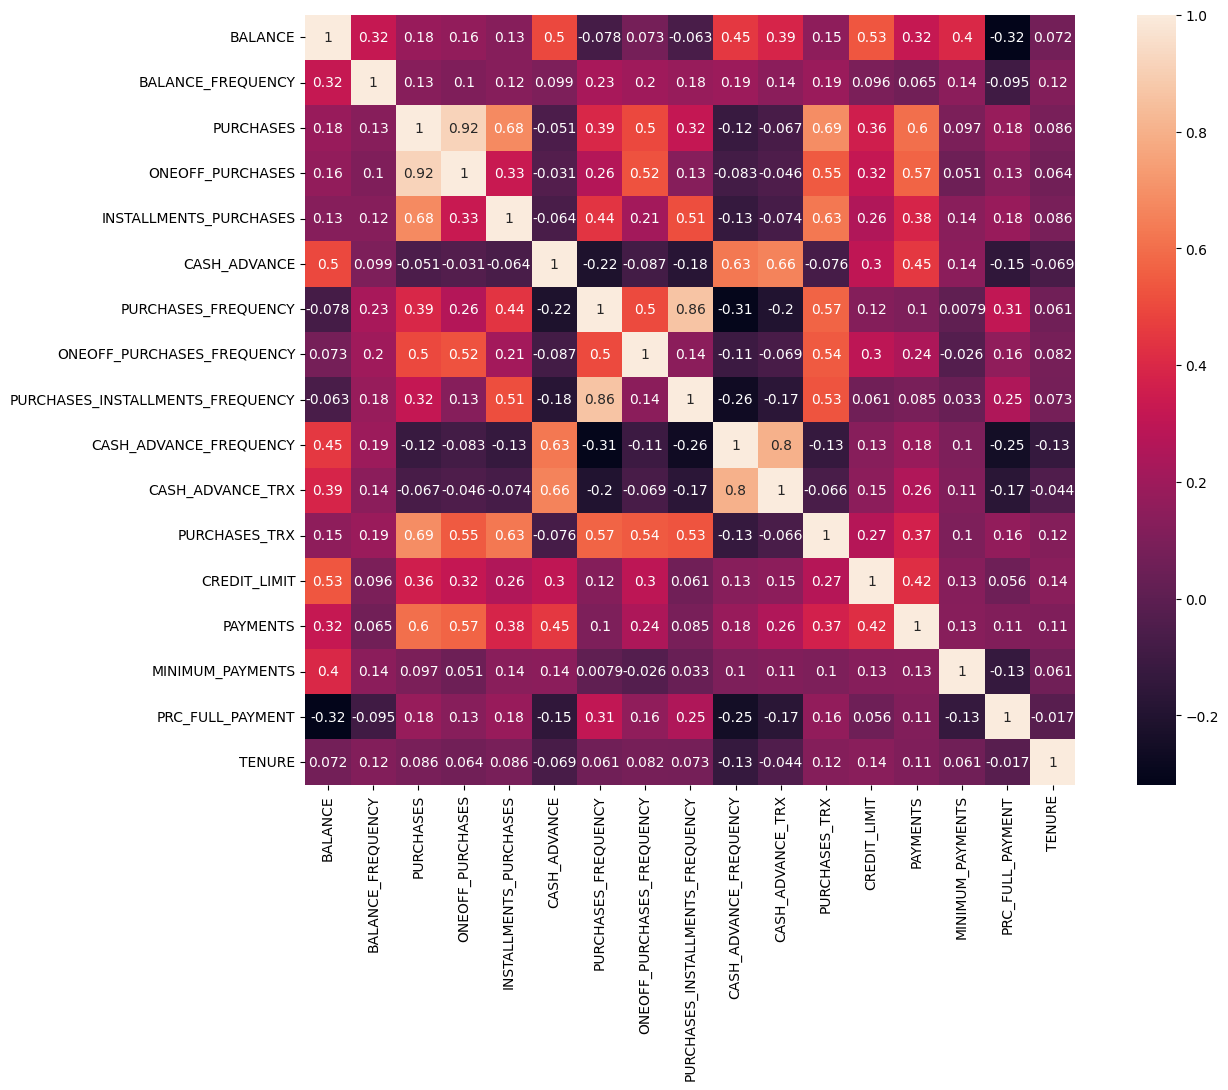

In [25]:
correlation_matrix = cust_data.corr()
plt.subplots(figsize=(16,10))
sn.heatmap(data = correlation_matrix, annot=True, square=True)
plt.show()

### Standardisation

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
scaled_cust_data = scaler.fit_transform(cust_data)
scaled_cust_data

array([[-0.73205404, -0.24988139, -0.4249337 , ..., -0.29733434,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , ...,  0.10199822,
         0.2341587 ,  0.36054128],
       [ 0.44704093,  0.51798018, -0.10771601, ..., -0.08852421,
        -0.52558844,  0.36054128],
       ...,
       [-0.74046257, -0.18589504, -0.40200016, ..., -0.32177443,
         0.32912795, -4.12691899],
       [-0.74523857, -0.18589504, -0.4695839 , ..., -0.33318841,
         0.32912795, -4.12691899],
       [-0.57264377, -0.88976603,  0.0420915 , ..., -0.31926131,
        -0.52558844, -4.12691899]])

### Modelling

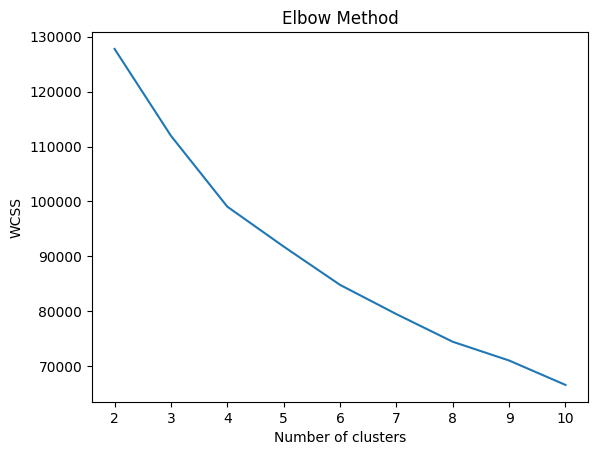

In [28]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=0, n_init=10)
    kmeans.fit(scaled_cust_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
model = KMeans(4, random_state=42, n_init=10)

In [30]:
cluster = model.fit(scaled_cust_data)

In [31]:
set(list(cluster.labels_))

{0, 1, 2, 3}

In [32]:
cust_data['CLUSTER'] = cluster.labels_

In [33]:
cust_data["CLUSTER"].value_counts()

CLUSTER
2    3977
1    3366
0    1197
3     409
Name: count, dtype: int64

In [34]:
# sn.pairplot(df, hue='CLUSTER', palette='Set1', corner=True)
# plt.show()

In [35]:
# sn.pairplot(cust_data, hue='CLUSTER', palette='Set1', corner=True)
# plt.show()

### Visualizations

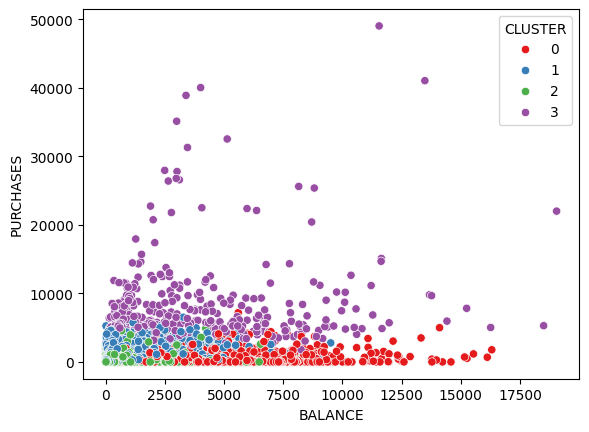

In [36]:
sn.scatterplot(cust_data, x='BALANCE', y='PURCHASES', hue='CLUSTER', palette='Set1')
plt.show()

In [37]:
cust_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'CLUSTER'],
      dtype='object')

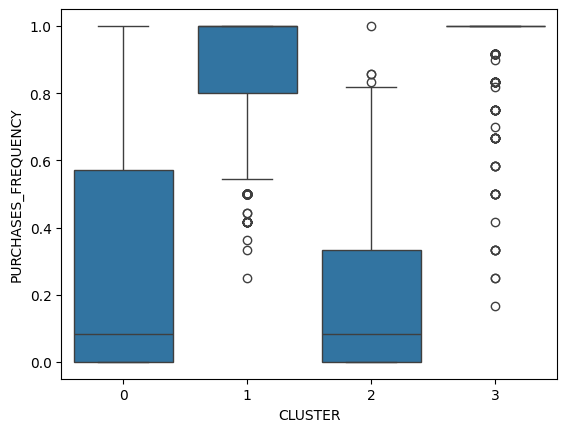

In [38]:
sn.boxplot(cust_data, x='CLUSTER', y='PURCHASES_FREQUENCY')
plt.show()

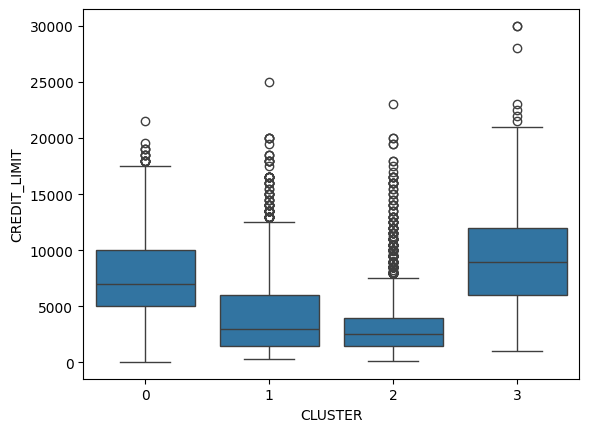

In [39]:
sn.boxplot(cust_data, x='CLUSTER', y='CREDIT_LIMIT')
plt.show()

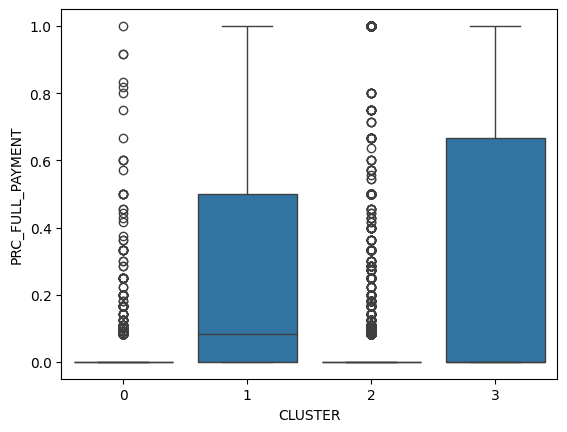

In [40]:
sn.boxplot(cust_data, x='CLUSTER', y='PRC_FULL_PAYMENT')
plt.show()

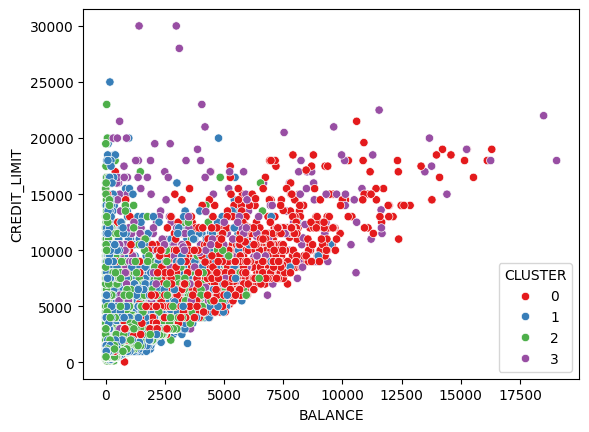

In [41]:
sn.scatterplot(cust_data, x='BALANCE', y='CREDIT_LIMIT', hue='CLUSTER', palette="Set1")
plt.show()

In [42]:
cust_data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
BALANCE,1.000000,0.322335,0.181230,0.164326,0.126437,0.496679,-0.078054,0.073114,-0.063267,0.449246,0.385139,0.154297,0.531283,0.322769,0.399628,-0.319018,0.072421,-0.291615
BALANCE_FREQUENCY,0.322335,1.000000,0.133586,0.104257,0.124204,0.099312,0.229440,0.202295,0.175869,0.192022,0.141516,0.189527,0.095843,0.064842,0.140586,-0.095308,0.118566,-0.223256
PURCHASES,0.181230,0.133586,1.000000,0.916844,0.679889,-0.051495,0.392991,0.498413,0.315537,-0.120137,-0.067194,0.689552,0.356963,0.603252,0.096977,0.180356,0.086155,0.212655
ONEOFF_PURCHASES,0.164326,0.104257,0.916844,1.000000,0.330610,-0.031341,0.264913,0.524881,0.127699,-0.082622,-0.046226,0.545514,0.319724,0.567283,0.051138,0.132745,0.064047,0.216423
INSTALLMENTS_PURCHASES,0.126437,0.124204,0.679889,0.330610,1.000000,-0.064264,0.442398,0.214016,0.511334,-0.132312,-0.074017,0.628097,0.256499,0.384066,0.135208,0.182548,0.086016,0.105362
CASH_ADVANCE,0.496679,0.099312,-0.051495,-0.031341,-0.064264,1.000000,-0.215579,-0.086786,-0.177118,0.628535,0.656493,-0.075877,0.303985,0.453226,0.141478,-0.152961,-0.068552,-0.414686
PURCHASES_FREQUENCY,-0.078054,0.229440,0.392991,0.264913,0.442398,-0.215579,1.000000,0.501305,0.862921,-0.308483,-0.203541,0.568408,0.119788,0.103393,0.007896,0.305761,0.061006,-0.236505
ONEOFF_PURCHASES_FREQUENCY,0.073114,0.202295,0.498413,0.524881,0.214016,-0.086786,0.501305,1.000000,0.142270,-0.111707,-0.069116,0.544849,0.295038,0.243503,-0.025819,0.157497,0.082234,0.025698
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063267,0.175869,0.315537,0.127699,0.511334,-0.177118,0.862921,0.142270,1.000000,-0.262955,-0.169250,0.529949,0.060755,0.085496,0.033387,0.250049,0.072926,-0.206369
CASH_ADVANCE_FREQUENCY,0.449246,0.192022,-0.120137,-0.082622,-0.132312,0.628535,-0.308483,-0.111707,-0.262955,1.000000,0.799573,-0.131161,0.132616,0.183206,0.102074,-0.249768,-0.133427,-0.397643


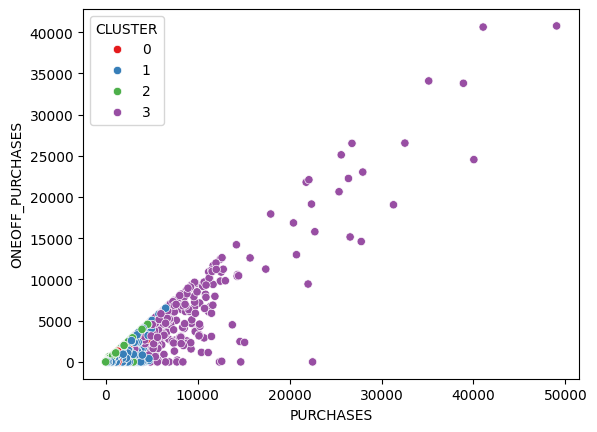

In [43]:
sn.scatterplot(cust_data, x='PURCHASES', y='ONEOFF_PURCHASES', hue='CLUSTER', palette="Set1")
plt.show()

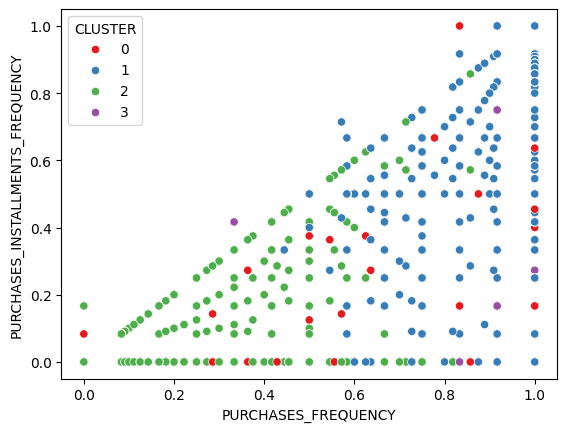

In [44]:
sn.scatterplot(cust_data, x='PURCHASES_FREQUENCY', y='PURCHASES_INSTALLMENTS_FREQUENCY', hue='CLUSTER', palette="Set1")
plt.show()

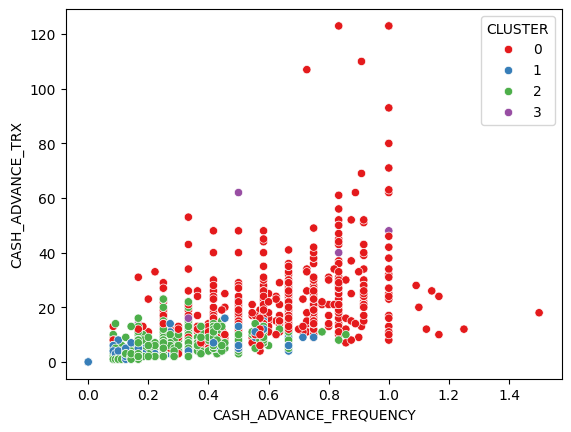

In [45]:
sn.scatterplot(cust_data, x='CASH_ADVANCE_FREQUENCY', y='CASH_ADVANCE_TRX', hue='CLUSTER', palette="Set1")
plt.show()

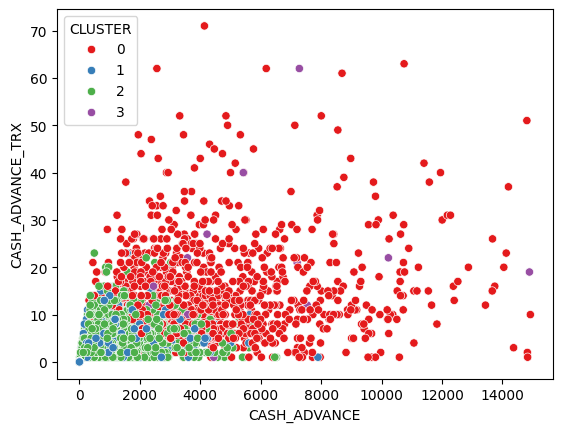

In [67]:
sn.scatterplot(cust_data[(cust_data.CASH_ADVANCE < 15000) & (cust_data.CASH_ADVANCE_TRX < 80)], x='CASH_ADVANCE', y='CASH_ADVANCE_TRX', hue='CLUSTER', palette="Set1")
plt.show()

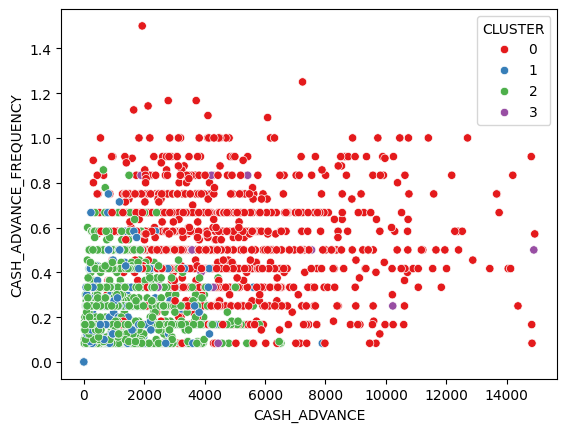

In [65]:
sn.scatterplot(cust_data[cust_data.CASH_ADVANCE < 15000], x='CASH_ADVANCE', y='CASH_ADVANCE_FREQUENCY', hue='CLUSTER', palette="Set1")
plt.show()

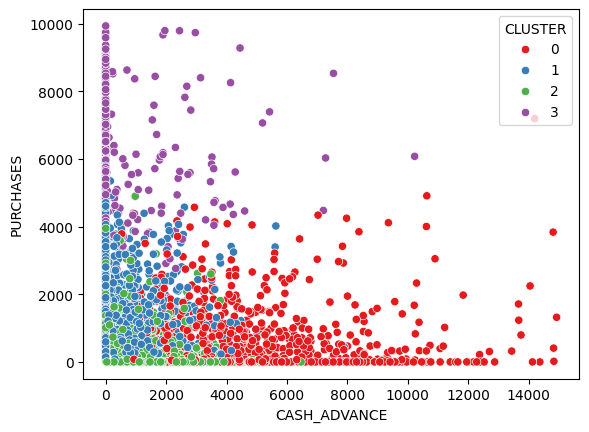

In [64]:
sn.scatterplot(cust_data[(cust_data.PURCHASES < 10000) & (cust_data.CASH_ADVANCE < 15000)], x='CASH_ADVANCE', y='PURCHASES', hue='CLUSTER', palette="Set1")
plt.show()

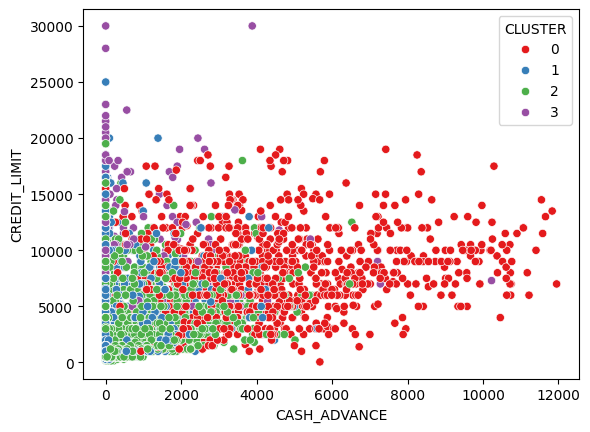

In [60]:
sn.scatterplot(cust_data[cust_data.CASH_ADVANCE < 12000], x='CASH_ADVANCE', y='CREDIT_LIMIT', hue='CLUSTER', palette="Set1")
plt.show()

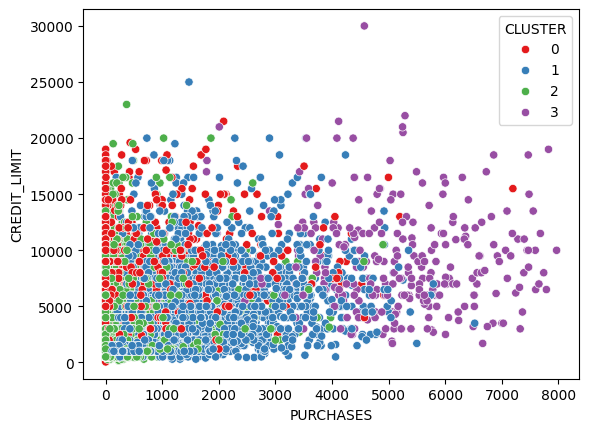

In [75]:
sn.scatterplot(cust_data[cust_data.PURCHASES < 8000], x='PURCHASES', y='CREDIT_LIMIT', hue='CLUSTER', palette="Set1")
plt.show()

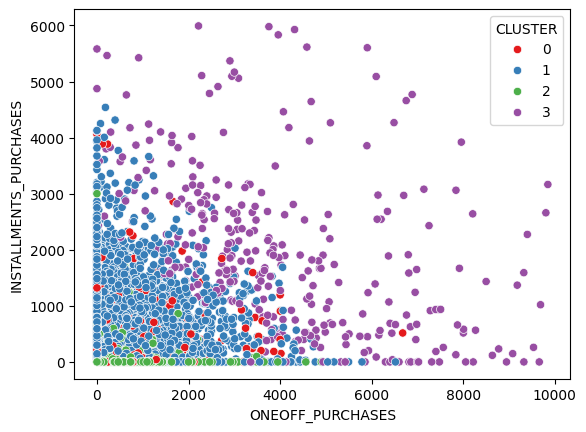

In [70]:
sn.scatterplot(cust_data[(cust_data.ONEOFF_PURCHASES < 10000) & (cust_data.INSTALLMENTS_PURCHASES < 6000)], x='ONEOFF_PURCHASES', y='INSTALLMENTS_PURCHASES', hue='CLUSTER', palette="Set1")
plt.show()

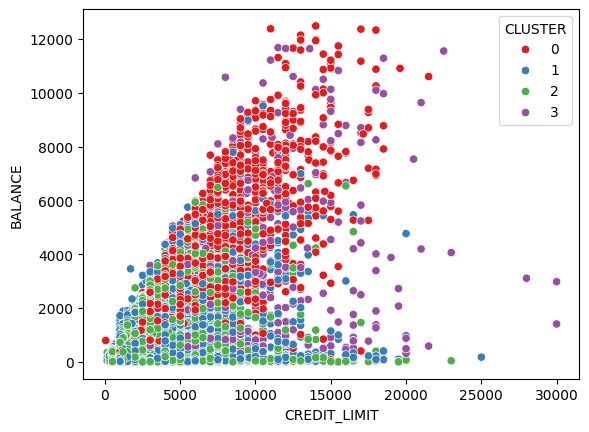

In [74]:
sn.scatterplot(cust_data[cust_data.BALANCE < 12500], x='CREDIT_LIMIT', y='BALANCE', hue='CLUSTER', palette="Set1")
plt.show()

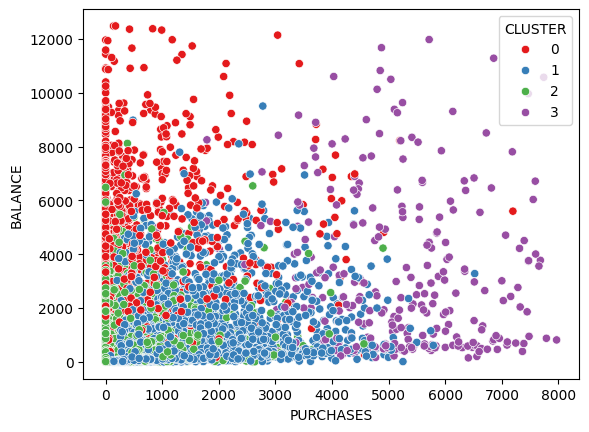

In [79]:
sn.scatterplot(cust_data[(cust_data.BALANCE < 12500) & (cust_data.PURCHASES < 8000)], x='PURCHASES', y='BALANCE', hue='CLUSTER', palette="Set1")
plt.show()

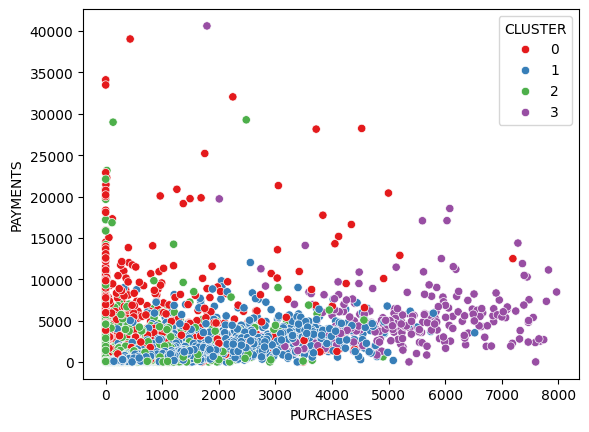

In [88]:
sn.scatterplot(cust_data[cust_data.PURCHASES < 8000], x='PURCHASES', y='PAYMENTS', hue='CLUSTER', palette="Set1")
plt.show()

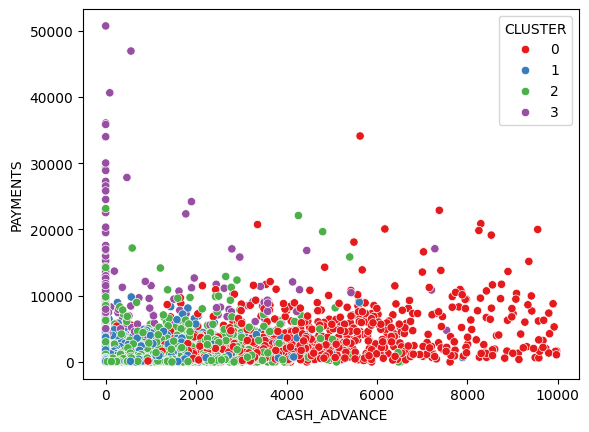

In [91]:
sn.scatterplot(cust_data[cust_data.CASH_ADVANCE < 10000], x='CASH_ADVANCE', y='PAYMENTS', hue='CLUSTER', palette="Set1")
plt.show()

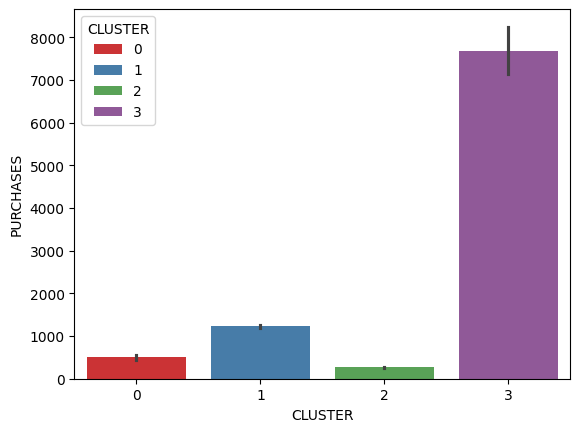

In [93]:
sn.barplot(cust_data, x='CLUSTER', y='PURCHASES', hue='CLUSTER', palette="Set1")
plt.show()

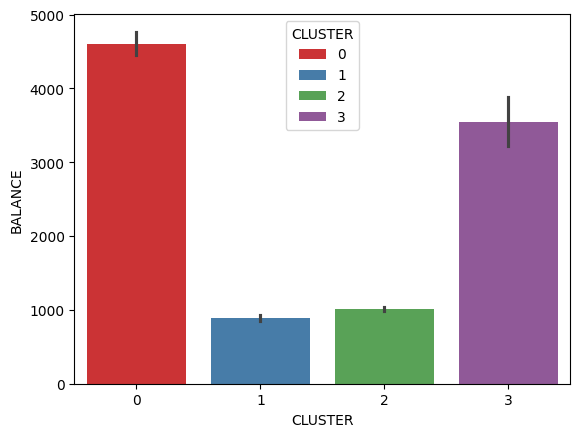

In [119]:
sn.barplot(cust_data, x='CLUSTER', y='BALANCE', hue='CLUSTER', palette="Set1")
plt.show()

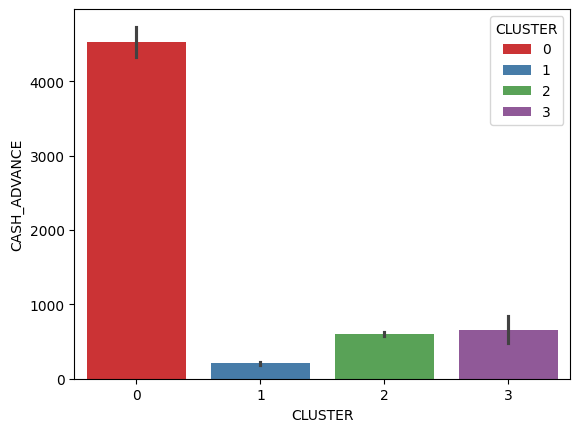

In [97]:
sn.barplot(cust_data, x='CLUSTER', y='CASH_ADVANCE', hue='CLUSTER', palette="Set1")
plt.show()

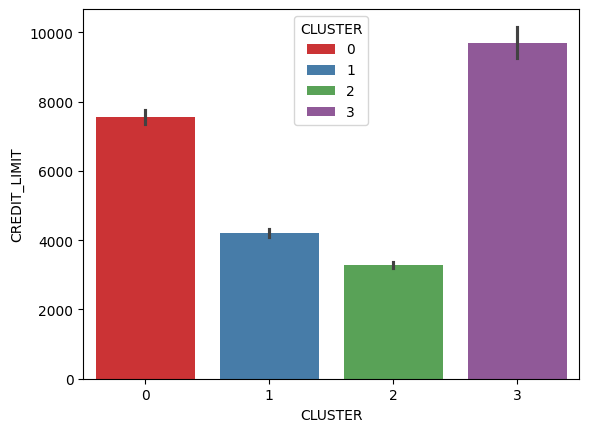

In [99]:
sn.barplot(cust_data, x='CLUSTER', y='CREDIT_LIMIT', hue='CLUSTER', palette="Set1")
plt.show()

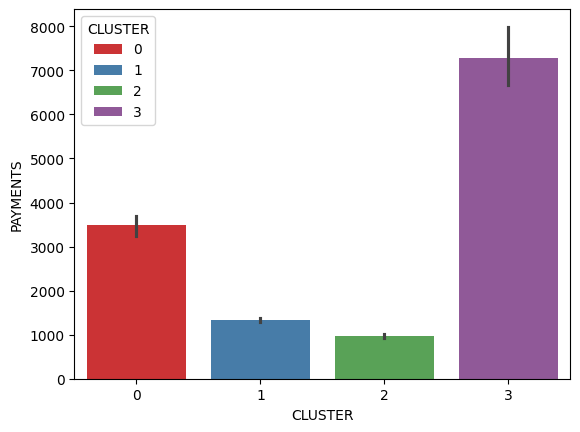

In [100]:
sn.barplot(cust_data, x='CLUSTER', y='PAYMENTS', hue='CLUSTER', palette="Set1")
plt.show()

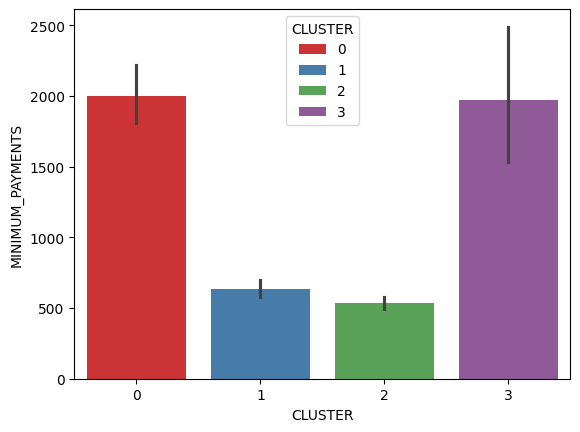

In [117]:
sn.barplot(cust_data, x='CLUSTER', y='MINIMUM_PAYMENTS', hue='CLUSTER', palette="Set1")
plt.show()

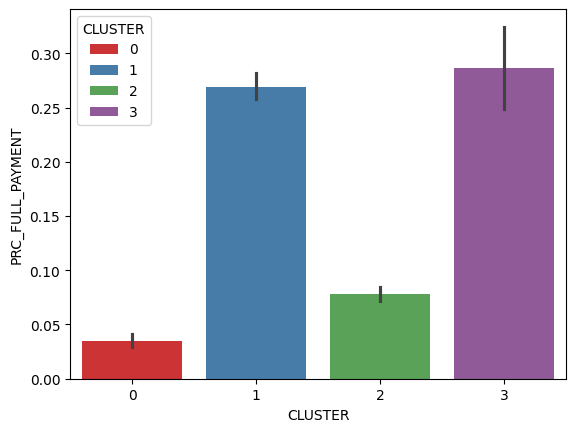

In [115]:
sn.barplot(cust_data, x='CLUSTER', y='PRC_FULL_PAYMENT', hue='CLUSTER', palette="Set1")
plt.show()

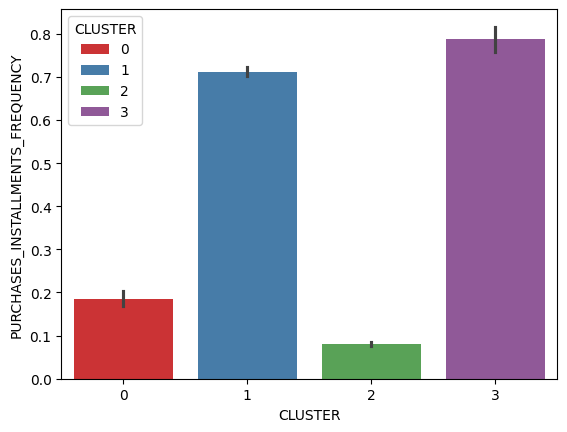

In [120]:
sn.barplot(cust_data, x='CLUSTER', y='PURCHASES_INSTALLMENTS_FREQUENCY', hue='CLUSTER', palette="Set1")
plt.show()

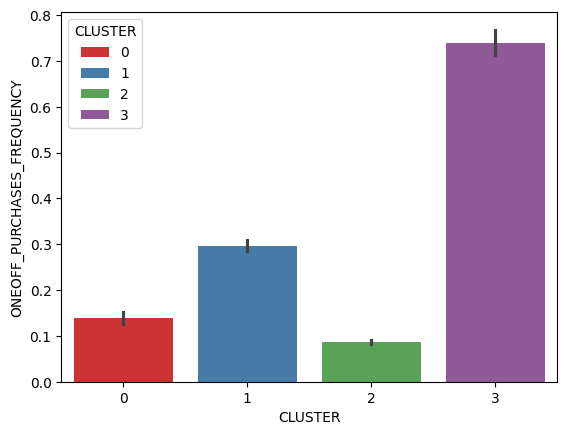

In [121]:
sn.barplot(cust_data, x='CLUSTER', y='ONEOFF_PURCHASES_FREQUENCY', hue='CLUSTER', palette="Set1")
plt.show()

In [68]:
cust_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'CLUSTER'],
      dtype='object')

## SUMMARY

Cluster 0:
  * Customers having more balance and hence taking MOST cash advance
  * Have a higher likelyhood of making minimum payments
  * High credit limit

Cluster 1:
  * Customers making more purchases on installments
  * Have less of maximum purchase in one go
  * Cluster is more biased towards purchases but on the lower range

Cluster 2:
  * Customers who have lowest credit limit hence make lesser purchases
  * Less balance and hence lowest payments

Cluster 3:
  * Elite customers having highest credit limit
  * So they have highest balance, make more purchases with high payments
  * Pay off more amount of minimum payments
  * Make the most full-payment purchases rather than installments
  * Make the most maximum purchase in one go